# Twitter Sentiment Analysis

In [1]:
import numpy as np
import os
import tweepy as tw
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from requests_oauthlib import OAuth1

# Using Twitter Credentials

In [4]:
# Twitter Developer Login
consumer_key="WLoHhI61vOWK44Ecb7fJFIvRR"
consumer_secret="XrSoQRRGtcYlxFxVBF7voeV9og3u9do2kwSW8CCOVaJYyvF3tY"

access_token="1568890958967627776-SuxWCDqo2mhrHQsusSqN690XDcZMAA"
access_token_secret="zZdmwP2D55VcA33UE8adtxBv1RiC960Mtm7d68770PI4a"

# identify the top trend of today in india

In [5]:
import twitter

In [6]:
abc = twitter.oauth.OAuth(access_token, access_token_secret,
                           consumer_key, consumer_secret)
 
twitter_api = twitter.Twitter(auth=abc)
 
# http://woeid.rosselliot.co.nz/lookup/india   ##23424848(india)  # 2295411 ( mumbai ) #20070458( delhi)
INDIA_WOE_ID = 23424848


# https://developer.twitter.com/en/docs/trends/trends-for-location/api-reference/get-trends-place
india_trends = twitter_api.trends.place(_id=INDIA_WOE_ID)

In [7]:
for trending in india_trends[0]['trends']:
    print(trending['name'], '-----' , trending['tweet_volume'])

#TOTLEI ----- 32277
#TheatreOwnersFavStarVijay ----- 31794
Leicester ----- 80599
HBD KARANVIR SHARMA ----- None
#WeWantVarisuOnOtt ----- 33119
Nikon ----- None
Sonny ----- 23835
#सवर्ण_एक्ट_बनाओ ----- 42336
Brendan Rodgers ----- None
Spurs ----- 34841
Umesh ----- None
#5YearswithDNA ----- 140831
Canon ----- 49895
Intense Personality Of Sushant ----- 30793
Conte ----- 46600
Maddison ----- 12559
Raval ----- None
Cheetah ----- 87850
Ward ----- 36727
ROCKING RUBINA RULING ITV ----- 82220
DHOL BAJAA SABKO NACHAA ----- None
KARAN GRACED PINKVILLA ROOM ----- 10679
Kane ----- 32866
Vlog ----- 40796
Balde ----- 37339
WE LOVE SHILPA SHINDE ----- 11121
ISHQ HO GAYA POSTER OUT ----- 115618
BRAND NEW TEASER 1 ----- 76313
Elche ----- 56545
Perisic ----- None
Dinner ----- 106175
Depay ----- 10367
Akhilesh ----- None
Bundesliga ----- 31575
Gadhe ----- None
Pedri ----- 30499
Photoshop ----- 19225
Sher ----- None
DIN CHADDA OUT TOMORROW ----- 53196
DIN CHADDA WITH PRATIK ----- 53111
Haaland ----- 170418

# Fetching data from twitter

In [8]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [9]:
new_search = "#Adani -filter:retweets"

tweets = tw.Cursor(api.search_tweets,     #api.search_tweets
                           q=new_search,
                           lang="en",
                           _id=23424848,
                          ##since="2021-08-08"
                          ).items(10)

In [10]:
users_locs = [[tweet.user.screen_name, tweet.user.location,tweet.source,
               tweet.place,tweet.created_at,tweet.user.geo_enabled,
               tweet.user.friends_count,tweet.text,tweet.retweet_count,
               tweet.retweeted] for tweet in tweets]

Unexpected parameter: _id


In [11]:
tweet_text2 = pd.DataFrame(data=users_locs, 
                    columns=['user', "location","source","place","created_at",
                             "geo_enabled","friends_count",
                             "text","retweet_count","retweeted_status"])
tweet_text2

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,valurank,"Austin, TX",Valurank,None,2022-09-17 18:46:14+00:00,False,371,Content analysis:\nThis article scores 69/100....,0,False
1,mustafaehind1,"Kuala Lumpur City, Kuala Lumpur Federal Territory",Twitter for iPhone,None,2022-09-17 18:40:13+00:00,False,19,@KichaManigandan It’s ok don’t accept and be h...,0,False
2,GujaratGiants,"Gujarat, India",Twitter Web App,None,2022-09-17 18:39:45+00:00,False,60,Aaj ke humare @AmbujaCementACL player of the m...,0,False
3,SinghPradhani,,Twitter for iPhone,None,2022-09-17 18:35:54+00:00,False,75,Early success is a scam!!\n\nRIP State bank of...,0,False
4,AdvTarun93,"Ghatkopar West, Mumbai",Twitter Web App,Place(_api=<tweepy.api.API object at 0x0000025...,2022-09-17 18:31:05+00:00,True,159,.@Adani_Elec_Mum Few streetlights outside Bomb...,0,False
5,CscMadanapalle,"MADANAPALLE, Chittoor Dist, AP",Twitter Web App,None,2022-09-17 18:30:58+00:00,False,4383,I am very happy to share you all that I succes...,0,False
6,allthingscro1,CRONOS,Twitter for Android,None,2022-09-17 18:26:03+00:00,False,313,@thesparkyhawk @gautam_adani @AmbujaCementACL ...,0,False
7,DataServicer,"India,Chennai",Twitter Web App,None,2022-09-17 18:25:37+00:00,False,18,Top 3 Secrets behind Adani's Millionaire Dream...,0,False
8,thesparkyhawk,usa,Twitter for Android,None,2022-09-17 18:23:21+00:00,False,519,@gautam_adani @AmbujaCementACL @ACCLimited Che...,3,False
9,SIP_INVEST0R,,Twitter for Android,None,2022-09-17 18:22:47+00:00,False,405,@ipo_mantra I never want to own an over-levere...,0,False


In [12]:
tweet_text2.iloc[1,7]

'@KichaManigandan It’s ok don’t accept and be happy with microsoft, meta and amazon.\n\n#adani #adaniwilmar #adaniports #atgl #adanigreen'

In [13]:
import os 
os.chdir(r"C:\Users\User\Desktop\Python code\Text Mining")

In [14]:
tweet_text2.to_csv("Technology.csv",index=False)

In [15]:
auth_params = {
    'consumer_key':'WLoHhI61vOWK44Ecb7fJFIvRR',
    'consumer_secret':'XrSoQRRGtcYlxFxVBF7voeV9og3u9do2kwSW8CCOVaJYyvF3tY',
    'access_token':'1568890958967627776-SuxWCDqo2mhrHQsusSqN690XDcZMAA',
    'access_token_secret':'zZdmwP2D55VcA33UE8adtxBv1RiC960Mtm7d68770PI4a'
}

# Creating an OAuth Client connection
auth = OAuth1 (
    auth_params['consumer_key'],
    auth_params['consumer_secret'],
    auth_params['access_token'],
    auth_params['access_token_secret']
)

In [16]:
# url according to twitter API
url_rest = "https://api.twitter.com/1.1/search/tweets.json"

# getting rid of retweets in the extraction results and filtering all replies to the tweet often uncessary for the analysis
q = '%40amazonIN -filter:retweets -filter:replies' # Twitter handle of Amazon India

# count : no of tweets to be retrieved per one call and parameters according to twitter API
params = {'q': q, 'count': 100, 'lang': 'en',  'result_type': 'recent'}
results = requests.get(url_rest, params=params, auth=auth)

In [17]:
tweets = results.json()

messages = [BeautifulSoup(tweet['text'], 'html5lib').get_text() for tweet in tweets['statuses']]
(messages)

['Excited for iphone 13mini, is it a hidden plan? @amazonIN \n#EpicMobilesDealOnAmazon https://t.co/7T6bWHpnoW',
 '#EpicMobilesDealOnAmazon @amazonIN \nMind blowing Deal🤩🤩 https://t.co/HMZCFxvXH0',
 'MY ENTRY 😁𝗦𝗰𝗿𝗲𝗲𝗻𝘀𝗵𝗼𝘁💪\n#AmazonSeLiya #ContestAlert \n#AmazonGreatIndianFestival  @amazonIN @Shraddh84128600 @amazonIN… https://t.co/M9GJcschrg',
 'After so many times click power and volume buttons I will capture this, please help me to win… https://t.co/hCft7xteAK',
 'Upcoming Mind-blowing Amazon Deal @amazonIN \n#EpicMobileDealsOnAmazon https://t.co/L9SXCUJsFG',
 "You're getting an iPhone under 40k this is insane, dont miss this deal guys.\n#EpicMobilesDealOnAmazon \n@amazonIN https://t.co/abwB2JyN00",
 'Price bucket - 15k to 20k @amazonIN #Biggestdealoftheyear https://t.co/1P5fFKyXMe',
 'Mind Blowing Amazon Deals\n#EpicMobilesDealOnAmazon \n@amazonIN https://t.co/ONPak8mxjZ',
 'Here It Is...... \nI Phone 12😍🥺\n#iPhone12DealOnAmazon #AmazonGreatIndianFestival \n@amazonIN https://t.co/P1N

In [18]:
import os 
os.chdir(r"C:\Users\User\Desktop\Python code\Text Mining")

In [19]:
data=pd.read_csv("Technology.csv")
data.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,valurank,"Austin, TX",Valurank,NaN,2022-09-17 18:46:14+00:00,False,371,Content analysis:\nThis article scores 69/100....,0,False
1,mustafaehind1,"Kuala Lumpur City, Kuala Lumpur Federal Territory",Twitter for iPhone,NaN,2022-09-17 18:40:13+00:00,False,19,@KichaManigandan It’s ok don’t accept and be h...,0,False
2,GujaratGiants,"Gujarat, India",Twitter Web App,NaN,2022-09-17 18:39:45+00:00,False,60,Aaj ke humare @AmbujaCementACL player of the m...,0,False
3,SinghPradhani,NaN,Twitter for iPhone,NaN,2022-09-17 18:35:54+00:00,False,75,Early success is a scam!!\n\nRIP State bank of...,0,False
4,AdvTarun93,"Ghatkopar West, Mumbai",Twitter Web App,Place(_api=<tweepy.api.API object at 0x0000025...,2022-09-17 18:31:05+00:00,True,159,.@Adani_Elec_Mum Few streetlights outside Bomb...,0,False


In [20]:
data=pd.DataFrame(data.text)

data.head()

,text
0,Content analysis:\nThis article scores 69/100....
1,@KichaManigandan It’s ok don’t accept and be h...
2,Aaj ke humare @AmbujaCementACL player of the m...
3,Early success is a scam!!\n\nRIP State bank of...
4,.@Adani_Elec_Mum Few streetlights outside Bomb...


In [21]:
data.iloc[0,0]

"Content analysis:\nThis article scores 69/100. The complete report can be viewed here: https://t.co/1POgXp0Z6k\n(I'm… https://t.co/AwQaK6g8Fc"

# Data Cleaning or Pre-Processing

Step 1 :- Lower case

In [22]:
data.text=data.text.str.lower()

In [23]:
data.iloc[0,0]

"content analysis:\nthis article scores 69/100. the complete report can be viewed here: https://t.co/1pogxp0z6k\n(i'm… https://t.co/awqak6g8fc"

Step 2 :- Punctuation

In [24]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
def remove_punctuation(text):
    text_nopunt="".join([c 
                         for c in text 
                         if c not in string.punctuation])
    return text_nopunt

In [26]:
data.iloc[0,0]

"content analysis:\nthis article scores 69/100. the complete report can be viewed here: https://t.co/1pogxp0z6k\n(i'm… https://t.co/awqak6g8fc"

In [27]:
data.text=data.text.apply(lambda x : remove_punctuation(x))

In [28]:
data.iloc[4,0]

'adanielecmum few streetlights outside bombay textile research association lbs marg ghatkopar w mumbai  40… httpstco1zqabyqfch'

# Remove url

In [30]:
data.text = data.text.str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[0,0]

<ipython-input-30-b1540a2d06db>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.text = data.text.str.replace(r'http\S+|www.\S+','',case=False)


'content analysis\nthis article scores 69100 the complete report can be viewed here \nim… '

# Remove Number

In [31]:
data.iloc[0,0]

'content analysis\nthis article scores 69100 the complete report can be viewed here \nim… '

In [32]:
data['text'] = data['text'].str.replace('\d+','')

<ipython-input-32-916cd1bd69a5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('\d+','')


In [33]:
data.iloc[0,0]

'content analysis\nthis article scores  the complete report can be viewed here \nim… '

# Removing Stop Words

In [34]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
data.iloc[0,0]

'content analysis\nthis article scores  the complete report can be viewed here \nim… '

In [36]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['text'] = data['text'].apply(lambda x: ' '.join([abc 
                                                      for abc in x.split() # word tokenizer
                                                      if abc not in (stop)]))

In [37]:
data.iloc[0,0]

'content analysis article scores complete report viewed im…'

# Common Words

In [38]:
data.iloc[0,0]

'content analysis article scores complete report viewed im…'

In [39]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'scapulary',
 'ataxic',
 'Gederathite',
 'Laodicean',
 'overlush',
 'thermostable',
 'hetaeristic',
 'ciliate',
 'Pisaca',
 'preshortage',
 'yearbook',
 'palliostratus',
 'Coniacian',
 'mannoketoheptose',
 'overable',
 'spirochete',
 'parasang',
 'coteful',
 'apaid',
 'undisplaying',
 'proaddition',
 'diffluent',
 'bankerdom',
 'mitt',
 'Cordaitales',
 'broo',
 'preterritorial',
 'quinovin',
 'saimy',
 'hysteroid',
 'intranquil',
 'quire',
 'adenoneure',
 'unimpowered',
 'refectorial',
 'coracopectoral',
 'prefigurativeness',
 'enclave',
 'wanter',
 'pharmacopoeian',
 'Comptonia',
 'tonguester',
 'catalytic',
 'monolobular',
 'nonadecane',
 'overtax',
 'synecdochic',
 'whity',
 'zoogenic',
 'inalterability',
 'eleoptene',
 'Nilometric',
 'Panorpidae',
 'miser',
 'Myrmeleon',
 'connumeration',
 'incandescency',
 'unnagging',
 'sparrowwort',
 'miserabilistic',
 'quisling',
 'screeman',
 'Wakore',
 'hierarchize',
 'pawnable',
 'partition',
 'adderwort',
 'declension',
 'Paulian',
 'wakif

In [40]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('Technology|Technolgys|Tech|Techno', '', text) #remove delhipolice
    text =  re.sub('Contents|Content|Cont|Conten','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text

In [41]:
# Let's take a look at the updated text
#data['text']=data['text'].apply(lambda x : clean_text_round2(x))
data = pd.DataFrame(data.text.apply(lambda x: clean_text_round2(x)))
data.iloc[4,0]

'outside textile research association'

# Stemming and Lemmatization

In [42]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # ASSIGNING
w_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") 
            for w in w_tokenizer.tokenize(text)]

In [44]:
data.iloc[0,0]

'content analysis article complete report'

In [46]:
data.text = data.text.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[0,0]

'content analysis article complete report'

# Strip extra whitespace

In [47]:
data.iloc[0,0]

'content analysis article complete report'

In [48]:
data['text'] = (data['text'].astype("str").str.rstrip())
data.iloc[0,0]

'content analysis article complete report'

# Term Document Matrix

In [49]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9
accept,0,1,0,0,0,0,0,0,0,0
analysis,1,0,0,0,0,0,0,0,0,0
article,1,0,0,0,0,0,0,0,0,0
association,0,0,0,0,1,0,0,0,0,0
bank,0,0,0,1,0,0,0,0,0,0


In [50]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,freq
accept,0,1,0,0,0,0,0,0,0,0,1
analysis,1,0,0,0,0,0,0,0,0,0,1
article,1,0,0,0,0,0,0,0,0,0,1
association,0,0,0,0,1,0,0,0,0,0,1
bank,0,0,0,1,0,0,0,0,0,0,1


In [51]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,9,freq
0,accept,0,1,0,0,0,0,0,0,0,0,1
1,analysis,1,0,0,0,0,0,0,0,0,0,1
2,article,1,0,0,0,0,0,0,0,0,0,1
3,association,0,0,0,0,1,0,0,0,0,0,1
4,bank,0,0,0,1,0,0,0,0,0,0,1


In [52]:
tdm1=tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-52-bfe7fe94cab4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA


,Word,freq
40,want,2
24,millionaire,2
5,business,2
16,happy,2
31,scam,1
25,outside,1
26,player,1
27,report,1
28,research,1
29,rich,1


C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


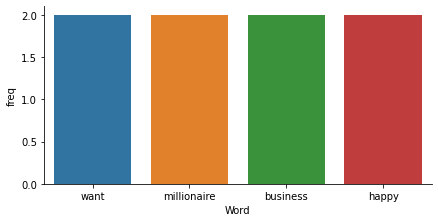

In [54]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=2] 
fg = sns.factorplot(x='Word', y='freq',
                        size=3,  aspect=2,
                        kind='bar', 
                        data=w)

# Word Cloud

In [55]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 344 words in the combination of all review.


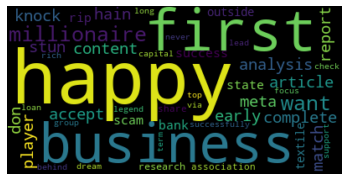

In [56]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="black",
                      collocations=False,
                       max_words=100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

# Sentiment Analysis

In [57]:
data

,text
0,content analysis article complete report
1,don accept happy meta
2,player match hain stun knock
3,early success scam rip state bank
4,outside textile research association
5,happy share successfully first business loan l...
6,legend
7,top behind millionaire dream millionaire rich via
8,check first support group
9,never want business want focus long term


In [58]:
data = data.drop_duplicates(subset='text')

In [59]:
data

,text
0,content analysis article complete report
1,don accept happy meta
2,player match hain stun knock
3,early success scam rip state bank
4,outside textile research association
5,happy share successfully first business loan l...
6,legend
7,top behind millionaire dream millionaire rich via
8,check first support group
9,never want business want focus long term


In [60]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['text'].apply(pol)
data.head(10)

,text,polarity
0,content analysis article complete report,0.100000
1,don accept happy meta,0.800000
2,player match hain stun knock,0.000000
3,early success scam rip state bank,0.200000
4,outside textile research association,0.000000
5,happy share successfully first business loan l...,0.525000
6,legend,0.000000
7,top behind millionaire dream millionaire rich via,0.158333
8,check first support group,0.250000
9,never want business want focus long term,-0.050000


In [61]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,text,polarity,Sentiment
0,content analysis article complete report,0.1,Positive
1,don accept happy meta,0.8,Positive
2,player match hain stun knock,0.0,Positive
3,early success scam rip state bank,0.2,Positive
4,outside textile research association,0.0,Positive


<AxesSubplot:>

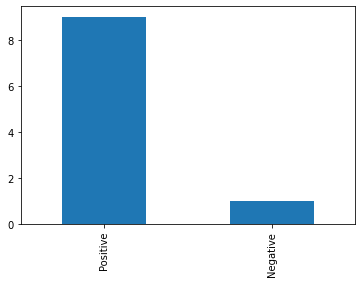

In [62]:
data.Sentiment.value_counts().plot.bar()

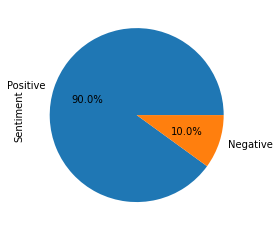

In [63]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");